# Distribution Plots
Some distribution plots are: 
+ displot
+ jointplot
+ pairplot
+ rugplot
+ kdeplot (Kernel Density Estimation)

<hr>

## Imports

In [24]:
import seaborn as sns
%matplotlib inline

## Data
Seaborn comes with built-in data sets

In [25]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<hr>

## displot
+ It shows distribution of one variable(univariate).

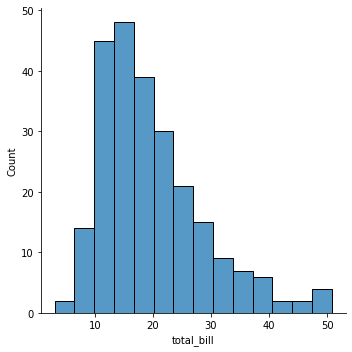

In [26]:
sns.displot(tips['total_bill'])

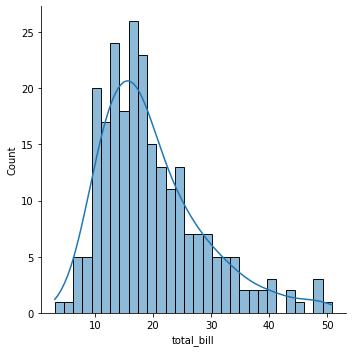

In [29]:
sns.displot(tips['total_bill'], bins=30, kde=True)

<hr>

## Jointplot
jointplot() allows us to basically match up two displots for bivariate data.<br>
We can choose what **kind** parameter to compare with:
+ scatter
+ reg
+ resid
+ kde
+ hex

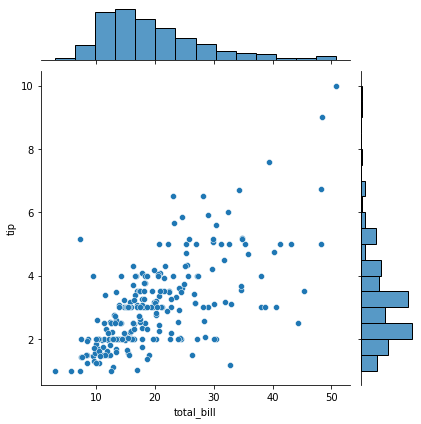

In [30]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='scatter')

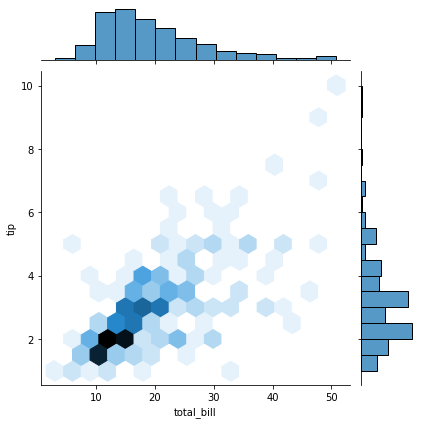

In [31]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')


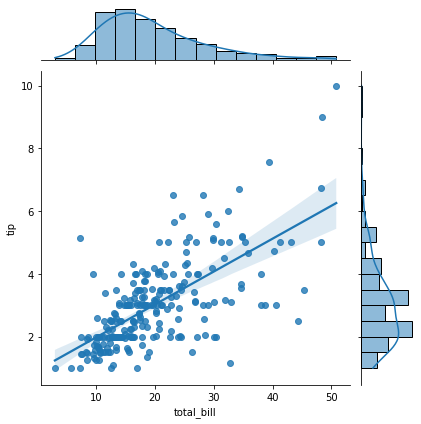

In [33]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

<hr>

## Pairplot
pairplot will plot pairwise relationships across an entire dataframe (for numerical columns) and supports a coloe hue argument (for categorical columns).

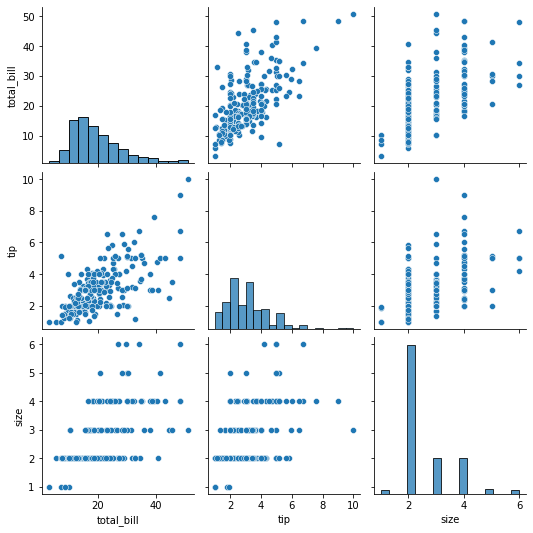

In [34]:
sns.pairplot(tips)

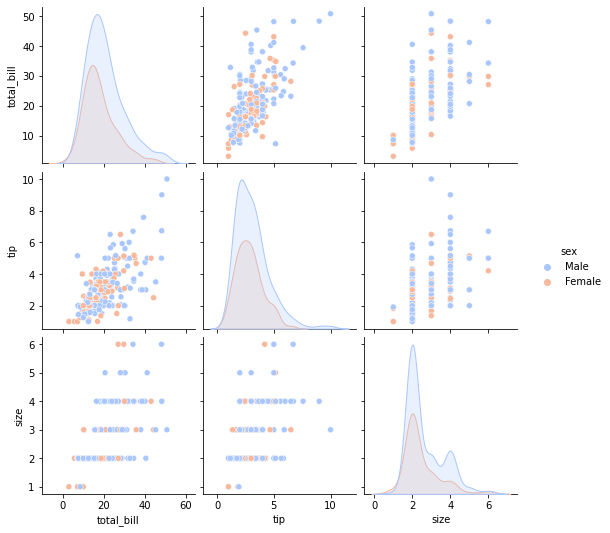

In [35]:
sns.pairplot(tips, hue='sex', palette='coolwarm')

<hr>

## rugplot
rugplots are actually a very simple cencept, they just draw a dash mark for every point on a univariate distributuion. They are the building block of KDE plot:

<AxesSubplot: xlabel='total_bill'>

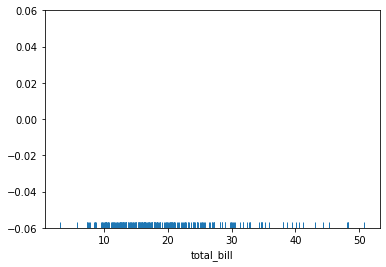

In [36]:
sns.rugplot(tips['total_bill'])

<hr>

## KDE plots (Kernal Density Plots)
kdeplots are Kernel Density Plots. These KDE plots replace every single observation with Gaussian (Normal) distribution centered around the value. 

(0.0, 1.0)

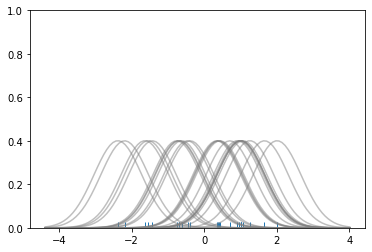

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Create dataset
dataset = np.random.randn(25)

# create aanother rugplot
sns.rugplot(dataset)

# set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min, x_max, 100)

# Set up the bandwidth
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**0.2

# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

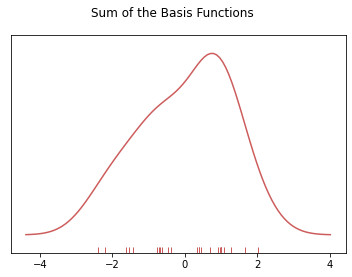

In [40]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

So for out tips dataset:

<AxesSubplot: xlabel='total_bill', ylabel='Density'>

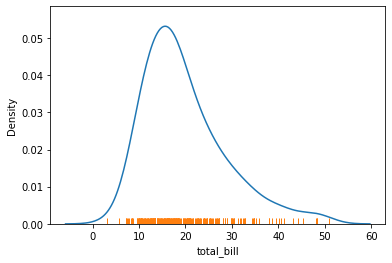

In [42]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

<hr>